In [10]:
import pandas as pd

df = pd.read_pickle("../Data/out.pkl")

df.head()


,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10


In [38]:
df["Majority"] = df["predict_state_SUM"] > 10
open_closed = df.groupby('Majority').count()
open_closed

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,diffs
Majority,,,,,,,,,
False,2200537,2200537,2200537,2200537,2200537,2200537,2200537,2200537,2200536
True,1901611,1901611,1901611,1901611,1901611,1901611,1901611,1901611,1901611


In [41]:
df["Majority"] = df["Majority"].astype(int)
majority = df["Majority"]
df["diffs"] = majority.diff()

extremes = df[df["diffs"] != 0]

extremes_start = extremes["start"]
lenghts = extremes_start.diff()
open_region_lengths = lenghts[2::2]
closed_region_lengths = lenghts[1::2]
open_region_lengths[:50]


872910     455.0
873559     271.0
873928     103.0
874146     283.0
874603    1001.0
874805     244.0
874901      89.0
875446     121.0
875854     246.0
876036     259.0
876904    1216.0
877028     176.0
877493     109.0
877858     578.0
878002     316.0
878136     241.0
878637     201.0
878731     191.0
878985     321.0
879183     184.0
879276     178.0
879502     243.0
880080     166.0
881275     198.0
885688      90.0
886617     216.0
890592      82.0
890805     134.0
891372     414.0
891580     305.0
891807     173.0
892005      89.0
892440     500.0
892853      91.0
893911      94.0
894609     130.0
894778     103.0
894842     152.0
895116     428.0
897413     203.0
897638     113.0
897760      80.0
901813      68.0
902080      94.0
902392      49.0
902913     140.0
903081     130.0
903394      79.0
903798     151.0
903980     215.0
Name: start, dtype: float64

Medianos
176.0
329.0

Sumos
28212379.0
59388558.0

Frakcija
0.32205567618529013
0.6779443238147099


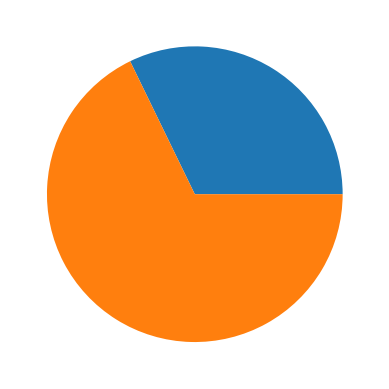

In [63]:
import matplotlib.pyplot as plt

print("Medianos")
print(open_region_lengths.median())
print(closed_region_lengths.median())

print("\nSumos")
s1 = open_region_lengths.sum()
print(s1)
s2 = closed_region_lengths.sum()
print(s2)

print("\nFrakcija")
print(s1/(s1+s2))
print(s2/(s1+s2))

plt.pie([s1, s2])
plt.show()

<BarContainer object of 2 artists>

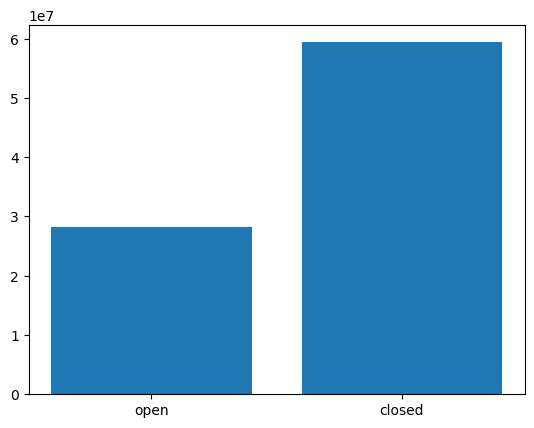

In [60]:
plt.bar(["open", "closed"], [s1, s2])

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,diffs
Majority,,,,,,,,,
0,2200537,2200537,2200537,2200537,2200537,2200537,2200537,2200537,2200536
1,1901611,1901611,1901611,1901611,1901611,1901611,1901611,1901611,1901611


In [39]:
df

,seqnames,start,end,CG_ID,TT_S0,TT_S1,TT_S2,predict_state_SUM,Majority,diffs
871479,18,3000019,3000019,18_3000019,0.0,0.0,0.0,6,False,NaN
871482,18,3000023,3000023,18_3000023,0.0,0.0,0.0,7,False,0.0
871484,18,3000025,3000025,18_3000025,0.0,0.0,0.0,7,False,0.0
871492,18,3000040,3000040,18_3000040,4.0,0.0,0.0,10,False,0.0
871502,18,3000066,3000066,18_3000066,0.0,0.0,0.0,10,False,0.0
...,...,...,...,...,...,...,...,...,...,...
4061463,18,90601940,90601940,18_90601940,0.0,0.0,0.0,0,False,0.0
4061464,18,90601946,90601946,18_90601946,0.0,0.0,0.0,0,False,0.0
4061465,18,90601952,90601952,18_90601952,0.0,0.0,0.0,0,False,0.0
4061466,18,90601957,90601957,18_90601957,0.0,0.0,0.0,0,False,0.0


In [49]:
import pyreadr

result = pyreadr.read_r('../Data/ATAC.RDS')
dfa = result[None]
print(dfa.head())
print()

LibrdataError: The file contains an unrecognized object

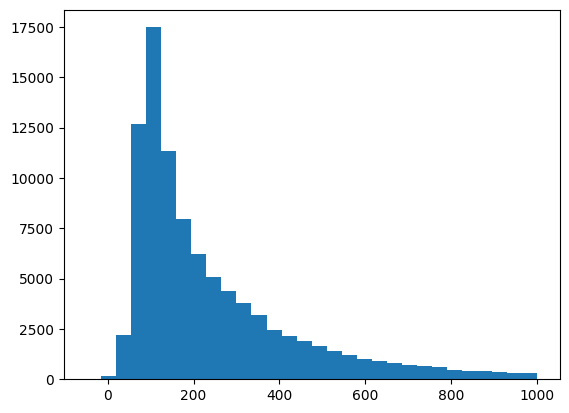

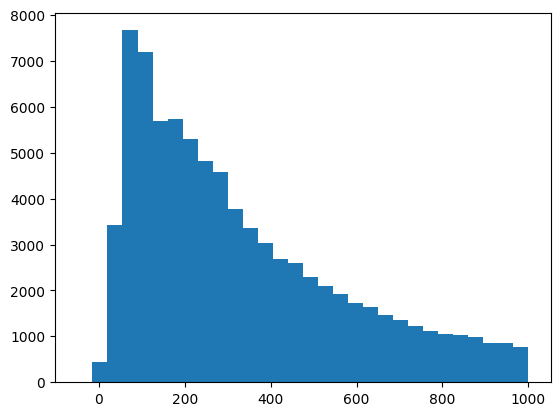

In [56]:
import matplotlib.pyplot as plt

plt.hist(open_region_lengths, bins=30, range=(-50, 1000))
plt.show()

plt.hist(closed_region_lengths, bins=30, range=(-50, 1000))
plt.show()